In [105]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [147]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)

#transform the TV values by square root since it contains log distribution
data['TV'] = np.sqrt(data['TV'])

X = data[['TV', 'Radio', 'Newspaper']]

#Box-Cox transfomation
#Y = np.array(Y)
Y, maxlog = stats.boxcox(Y)


#for i in X.columns:
   # X[i + 'square'] = np.square(X[i])

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

#sns.pairplot(data)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[3.35418929e-01 6.05978905e-02 2.35871860e-04]]

Intercept: 
 [0.84863014]

R-squared:
0.9373373257723967


# Multivariate normality

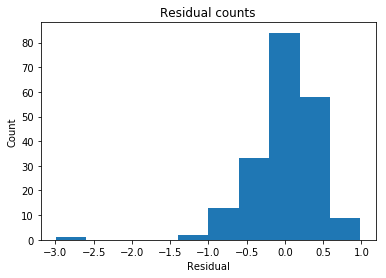

In [148]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y.ravel()

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Homoscedasticity

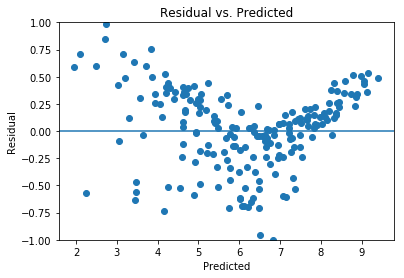

In [150]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.ylim(-1,1)

plt.show()


# Hm... looks a bit concerning.

# Low multicollinearity

,TV,Radio,Newspaper
TV,1.000,0.040,0.042
Radio,0.040,1.000,0.294
Newspaper,0.042,0.294,1.000


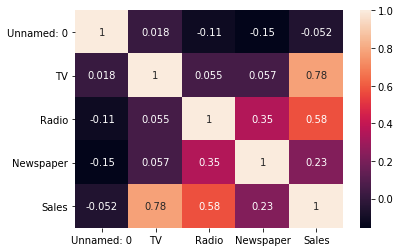

In [109]:
correlation_matrix = X.corr()
display(correlation_matrix)

sns.heatmap(data.corr(), annot=True)


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.